## Gradient Descent for Multivariate Linear Regression

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
df = pd.read_csv('ex1data2.txt',sep=",",names=('X1','X2','Y'))
df.head()

,X1,X2,Y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
len(df)

47

In [4]:
# h(x) = t0(x0) + t1(x1) + t2(x2)

t0_t1_t2_j_coords = [] 
def linreg_gradient_descent(theta_0, theta_1, theta_2, df, alpha, cycles):
    # Prepare vectors to multiply (theta_vec * x_vec), which solves the linear equation h(x). 
    # list of x-feature vectors [[x0(1),x1(1),x2(1)]...,[x0(47),x1(47),x2(47)]], where x0=1
    
    m = len(df)
    x1_list_norm = []
    x2_list_norm = []
    y_list = []
    x_vec = []
    x1_stdev = statistics.stdev(df['X1'])
    x1_mean = statistics.mean(df['X1'])
    x2_stdev = statistics.stdev(df['X2'])
    x2_mean = statistics.mean(df['X2'])
    
    # Mean Normalization for features
    for i, x1, x2, y in df.itertuples():
        x1 = (x1-x1_mean) / x1_stdev 
        x2 = (x2-x2_mean) / x2_stdev 
        x_vec.append(np.array([1,x1,x2]).reshape(3,1))  
        x1_list_norm.append(x1)
        x2_list_norm.append(x2)
        y_list.append(y)
    
    # Perform gradient descent with input theta_0, theta_1, theta_2
    theta_0_mean_diff = []
    theta_1_mean_diff = []
    theta_2_mean_diff = []
    mean_sq_diff_J = []
    theta_t = np.array([theta_0, theta_1, theta_2]).reshape(1,3)
    i=0
    for vec in x_vec:
        # theta0 (mean error) * (coefficient x0)
        term_0 = (np.matmul(theta_t, vec)-y_list[i])*vec[0]
        theta_0_mean_diff.append(term_0)

        # theta1 (mean error) * (coefficient x1)
        term_1 = (np.matmul(theta_t, vec)-y_list[i])*vec[1]
        theta_1_mean_diff.append(term_1)
        
        # theta2 (mean error) * (coefficient x1)
        term_2 = (np.matmul(theta_t, vec)-y_list[i])*vec[2]
        theta_2_mean_diff.append(term_2)

        # J(theta) (mean error squared)
        term_J = (np.matmul(theta_t, vec)-y_list[i])**2
        mean_sq_diff_J.append(term_J)

        i=i+1
    
    # Save initial thetas and resulting J into list of 3D coords (t_0, t_1, J)
    j_theta = (1/(2*m))*sum(mean_sq_diff_J)
    t0_t1_t2_j_coords.append((np.around(float(theta_0), decimals=5), 
                            np.around(float(theta_1), decimals=5),
                            np.around(float(theta_2), decimals=5),
                            np.around(float(j_theta), decimals=5)))
    
    # Update thetas:
    theta_0 = theta_0 - alpha*1/m*sum(theta_0_mean_diff)
    theta_1 = theta_1 - alpha*1/m*sum(theta_1_mean_diff)
    theta_2 = theta_2 - alpha*1/m*sum(theta_2_mean_diff)
    
    # Recursively iterate through updated thetas until specified amount of entries 
    if len(t0_t1_t2_j_coords) < cycles:
        linreg_gradient_descent(theta_0, theta_1, theta_2, df, alpha, cycles)      
    else:
        t_0 = []
        t_1 = []
        t_2 = []
        j = []
        for coord in t0_t1_t2_j_coords:
            t_0.append(coord[0])
            t_1.append(coord[1])  
            t_2.append(coord[2])
            j.append(coord[3])
        
        # Summarize Results =========================================================
        print(f'''Initialized with:
            theta_0 = {t0_t1_t2_j_coords[0][0]}  
            theta_1 = {t0_t1_t2_j_coords[0][1]} 
            theta_2 = {t0_t1_t2_j_coords[0][1]} 
            alpha = {alpha}
            cycles =  {cycles}''')
        print(f'The minimum J after {cycles} cycles is: {min(j)}')
        print(f'The index of minimum J after {cycles} cycles is: {np.argmin(j)}')
        print(f'The minimum (t0, t1, t2, j) coordinate is: {t0_t1_t2_j_coords[np.argmin(j)]}')
        print(f'The line of best fit is: h(x) = {t0_t1_t2_j_coords[np.argmin(j)][0]} + {t0_t1_t2_j_coords[np.argmin(j)][1]}x1 + {t0_t1_t2_j_coords[np.argmin(j)][2]}x2')
        print('\n')
        
        #Plot the cost function J(t0, t1, t2) =========================================
        #4D - Impossible

 
        # Create list of predicted Y values using the new hypothesis
        predicted_y_list = []
        theta_ref = t0_t1_t2_j_coords[np.argmin(j)]
        for x in x_vec:
            predicted_y = theta_ref[0] + theta_ref[1]*x[1] + theta_ref[2]*x[2]
            predicted_y_list.append(predicted_y)
        y_array = np.array(y_list).reshape(1,47)
        predicted_y_array = np.array(predicted_y_list).reshape(1,47)
        
        # Plot the (X1, X2, predicted_Y) with the new h(x)
        fig = plt.figure(figsize=(14,6))
        fig.subplots_adjust(wspace=0.3)
        
        ax = fig.add_subplot(1,2,1,projection='3d')
        p = ax.scatter(x1_list_norm, x2_list_norm, y_list, linewidth=1, color='r')
        p = ax.plot_wireframe(x1_list_norm, x2_list_norm, predicted_y_array, linewidth=1, color='b')
        ax.set_xlabel("X1")
        ax.set_ylabel("X2")
        ax.set_zlabel("Y")
        ax.set_title("Line of best fit")
        
        # Plot Cost Function J(t0,t1) vs. Cycles
        x_cycles = np.arange(0,cycles,1)
        ax = fig.add_subplot(1,2,2)
        ax.set_xlabel('Cycles')
        ax.set_ylabel('J')
        ax.set_title('J(t0, t1, t2) per Cycle')
        ax.plot(x_cycles, j, color="red", linewidth=1)
        

Initialized with:
            theta_0 = 0.0  
            theta_1 = 1.0 
            theta_2 = 1.0 
            alpha = 0.02
            cycles =  1500
The minimum J after 1500 cycles is: 2043280050.6109
The index of minimum J after 1500 cycles is: 1499
The minimum (t0, t1, t2, j) coordinate is: (340412.65957, 110630.91334, -6649.33734, 2043280050.6109)
The line of best fit is: h(x) = 340412.65957 + 110630.91334x1 + -6649.33734x2




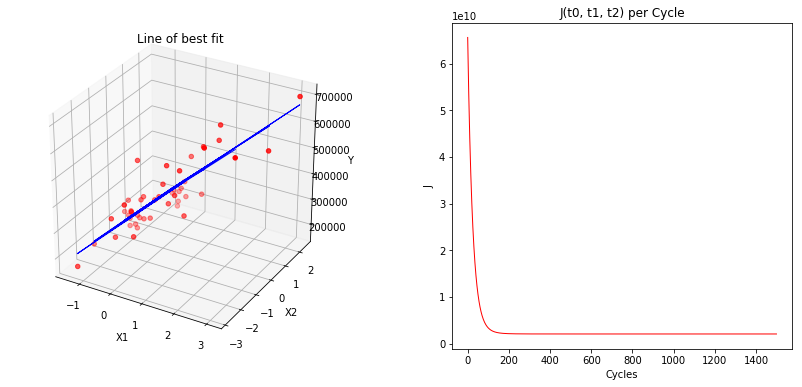

In [5]:
t0_t1_t2_j_coords = [] 
linreg_gradient_descent(0, 1, 1, df, 0.02, 1500)

Initialized with:
            theta_0 = 340412.65957  
            theta_1 = 110630.91334 
            theta_2 = 110630.91334 
            alpha = 0.02
            cycles =  1000
The minimum J after 1000 cycles is: 2043280050.60283
The index of minimum J after 1000 cycles is: 408
The minimum (t0, t1, t2, j) coordinate is: (340412.65957, 110631.04626, -6649.47026, 2043280050.60283)
The line of best fit is: h(x) = 340412.65957 + 110631.04626x1 + -6649.47026x2




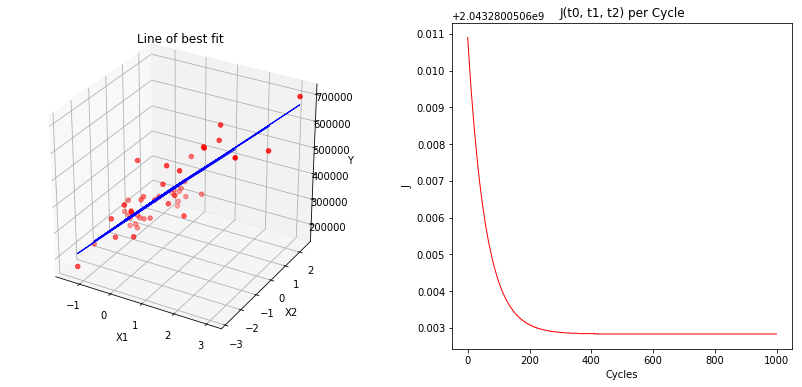

In [6]:
# Reinitialize with new thetas:
t0_t1_t2_j_coords = [] 
linreg_gradient_descent(340412.65957, 110630.91334, -6649.33734, df, 0.02, 1000)

In [7]:
t0_t1_t2_j_coords[0]

(340412.65957, 110630.91334, -6649.33734, 2043280050.6109)

## Normal Equation

In [8]:
x1_list = [x1 for i, x1, x2, y in df.itertuples()]
x2_list = [x2 for i, x1, x2, y in df.itertuples()]
x_list = [[1,x1,x2] for i, x1, x2, y in df.itertuples()]
y_list = [y for i, x1, x2, y in df.itertuples()]

x_array = np.array(x_list).reshape(47,3)
y_array = np.array(y_list).reshape(47,1)

# Input arrays into Normal Equation to get the constants (thetas) for the linear equation:
xt_x_inv = np.linalg.inv(np.matmul(np.transpose(x_array), x_array))
xt_y = np.matmul(np.transpose(x_array), y_array)
theta = np.matmul(xt_x_inv, xt_y)
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [9]:
# Normal Equation Y Predictions
predicted_y_list_norm = []
for i, x1, x2, y in df.itertuples():
    predicted_y_norm = theta[0] + theta[1]*x1 + theta[2]*x2
    predicted_y_list_norm.append(predicted_y_norm)
predicted_y_array_norm = np.array(predicted_y_list_norm).reshape(1,len(predicted_y_list_norm))

# Gradient Descent Y Predictions
x1_list_scaled = []
x2_list_scaled = []
x_list_scaled = []
for i, x1, x2, y in df.itertuples():
    x1 = (x1- statistics.mean(df['X1'])) / statistics.stdev(df['X1']) 
    x2 = (x2- statistics.mean(df['X2'])) / statistics.stdev(df['X2'])  
    x1_list_scaled.append(x1)
    x2_list_scaled.append(x2)
    x_list_scaled.append((x1,x2))

j = [coord[3] for coord in t0_t1_t2_j_coords]
t0_t1_t2 = [t0_t1_t2_j_coords[np.argmin(j)][0],
            t0_t1_t2_j_coords[np.argmin(j)][1],
            t0_t1_t2_j_coords[np.argmin(j)][2]]
predicted_y_list_GD = []
for x in x_list_scaled:
    predicted_y_GD = t0_t1_t2[0] + t0_t1_t2[1]*x[0] + t0_t1_t2[2]*x[1]
    predicted_y_list_GD.append(predicted_y_GD)
predicted_y_array_GD = np.array(predicted_y_list_GD).reshape(1, len(predicted_y_list_GD))

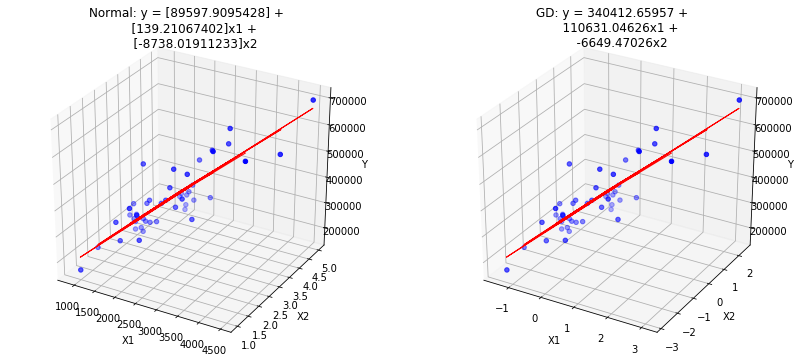

In [18]:
# Plot the normal equation
# y = 89597.9095428 + 139.21067402(x1) -8738.01911233(x2)

fig_N = plt.figure(figsize=(14,6))
fig_N.subplots_adjust(wspace=0.2)

ax = fig_N.add_subplot(1,2,1,projection='3d')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title(f'''Normal: y = {theta[0]} + 
    {theta[1]}x1 + 
    {theta[2]}x2''')
p = ax.scatter(x1_list, x2_list, y_list, linewidth=1, color='b')
p = ax.plot_wireframe(x1_list, x2_list, predicted_y_array_norm, linewidth=1, color='r')

ax = fig_N.add_subplot(1,2,2,projection='3d')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title(f'''GD: y = {t0_t1_t2[0]} + 
    {t0_t1_t2[1]}x1 + 
    {t0_t1_t2[2]}x2''')
p = ax.scatter(x1_list_scaled, x2_list_scaled, y_list, linewidth=1, color='b')
p = ax.plot_wireframe(x1_list_scaled, x2_list_scaled, predicted_y_array_GD, linewidth=1, color='r')